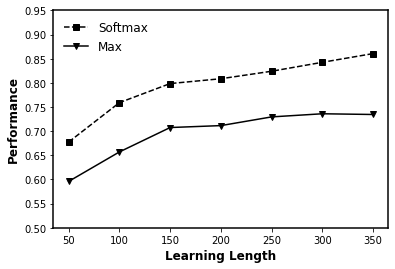

[0.6775, 0.759, 0.7985, 0.8085, 0.824, 0.8425, 0.8605]
[0.596, 0.657, 0.7075, 0.7115, 0.7295, 0.736, 0.7345]


<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import pickle
legend_properties = {'weight':'bold'}
data_folder = r"E:\data\hai-0307\Fang2009_16"
performance_max_file = data_folder + r"\max_performance_across_episodes"
performance_softmax_file = data_folder + r"\softmax_performance_across_episodes"
steps_max_file = data_folder + r"\max_steps_across_episodes"
steps_softmax_file = data_folder + r"\softmax_steps_across_episodes"
knowledge_file = data_folder + r"\knowledge_across_episodes"

with open(performance_max_file, 'rb') as infile:
    performance_max = pickle.load(infile)
with open(performance_softmax_file, 'rb') as infile:
    performance_softmax = pickle.load(infile)
with open(steps_max_file, 'rb') as infile:
    steps_max = pickle.load(infile)
with open(steps_softmax_file, 'rb') as infile:
    steps_softmax = pickle.load(infile)
with open(knowledge_file, 'rb') as infile:
    knowledge = pickle.load(infile)

# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, performance_softmax, "k--s", label="Softmax")
plt.plot(x, performance_max, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
ax.set_ylim(0.50, 0.95)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_Max_performance.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print(performance_softmax)
print(performance_max)
# should be start with 0.73 (max) and 0.82 (softmax)
# at the third sample, should be as close as to 1% difference

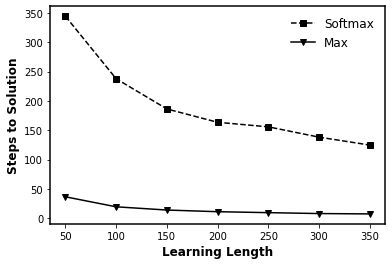

[344.3345, 237.785, 186.2585, 163.5285, 155.776, 138.201, 124.6895]
[36.4715, 19.4295, 13.902, 11.0835, 9.4585, 7.916, 7.3025]


<Figure size 432x288 with 0 Axes>

In [8]:
# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, steps_softmax, "k--s", label="Softmax")
plt.plot(x, steps_max, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Steps to Solution', fontweight='bold', fontsize=12)
# plt.xticks(x)
# ax.set_ylim(0.50, 0.95)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Steps_across_episodes.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print(steps_softmax)
print(steps_max)

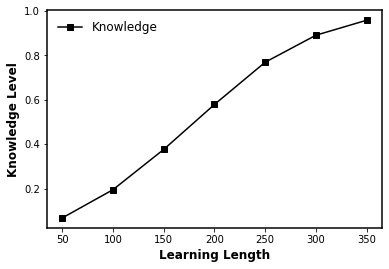

[0.06755517578125, 0.1949560546875, 0.37646533203125, 0.57911572265625, 0.76971484375, 0.89135888671875, 0.9589189453125]


<Figure size 432x288 with 0 Axes>

In [9]:
# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
# x = [50, 100, 150]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, knowledge, "k-s", label="Knowledge")
# plt.plot(x, steps_max, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Knowledge Level', fontweight='bold', fontsize=12)
# plt.xticks(x)
# ax.set_ylim(0.50, 0.95)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Knowledge_across_episodes.png", transparent=True, dpi=300)
plt.show()
plt.clf()
print(knowledge)